## The goal of this XP:

- Build the anatomical and the functional montage images without layout 

- Generate a binary mask of pixels that are pure white pixels in the func image 

- in the functional iamges, replace the mask by pixels from the anatomical image


In [1]:
clear all
% build path
addpath(genpath('../Misc'))
build_path  niak psom zooniverse_qc  

Adding library niak to the search path.

Adding library psom to the search path.

Adding library zooniverse_qc to the search path.



In [2]:
% Set parameters
path_root = '/home/yassinebha/Drive/QC_zooniverse/';
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse/';
subject = 'X_0015002'

subject = X_0015002


# Make anatomical and Functional montage images 

### ANAT

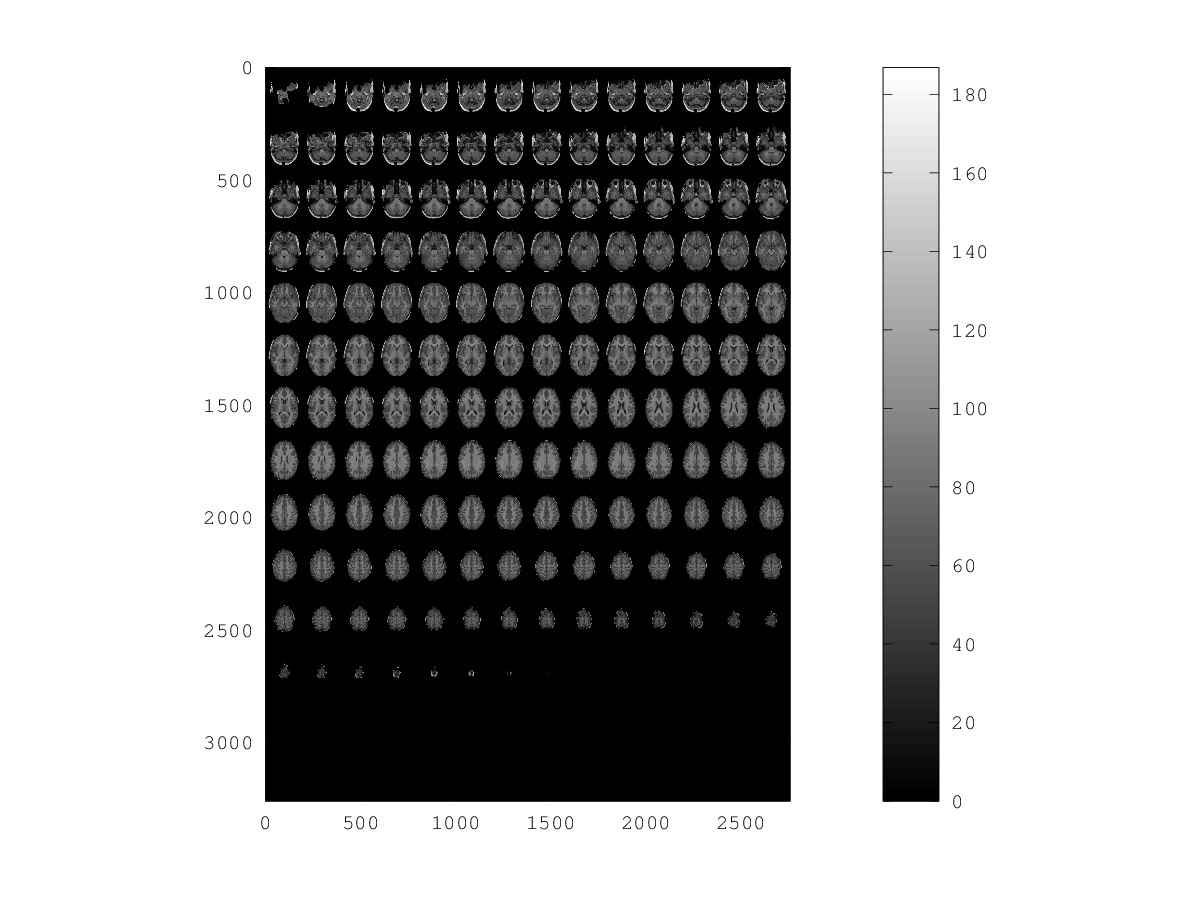

In [3]:
# anat subject vol 
niak_gb_vars
[hdr,vol] = niak_read_vol([path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl.nii.gz']);
[hdr,mask] = niak_read_vol([ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_asym_09a_headmask.mnc.gz']);
opt.type_color = 'gray';
niak_montage(vol,opt)

    imformats>default_formats at line 256 column 11
    imformats at line 79 column 3
    imwrite at line 99 column 7
    niak_brick_vol2img at line 143 column 5


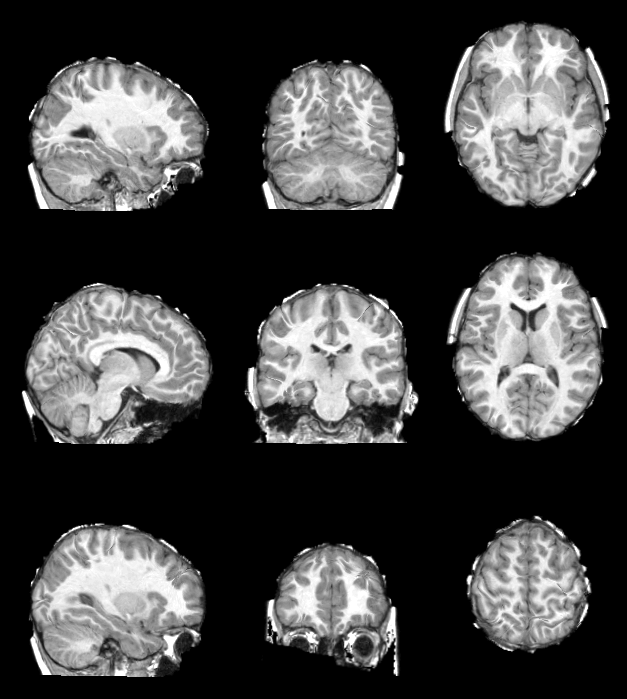

In [4]:
% Create montage for the image
clear jin jout jopt
% Input
jin.source = [path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = false;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

## FUNC

In [6]:
# Alpply non uniformity corretion first
clear  files_in files_out opt
files_in.vol = [path_root 'template_layout/test_data/' subject '/func_' subject '_mean_stereonl.nii.gz'];
files_in.mask = [path_root 'template_layout/test_data/' subject '/func_mask_group_stereonl.nii.gz'];
files_out.vol_nu = '';
files_out.vol_imp = '';
opt.folder_out =  [path_root 'template_layout/test_data/' subject '/'];
[files_in,files_out,opt] = niak_brick_nu_correct(files_in,files_out,opt);


*****************************************
Non-uniformity correction on an MR volume
*****************************************
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/X_0015002/func_X_0015002_mean_stereonl.nii.gz to /tmp/niak_tmp_148262940_func_X_0015002_mean_stereonl/vol.mnc
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/X_0015002/func_mask_group_stereonl.nii.gz to /tmp/niak_tmp_148262940_func_X_0015002_mean_stereonl/mask.mnc
Running NU_CORRECT with the following command:
nu_correct -clobber -tmpdir /tmp/niak_tmp_148262940_func_X_0015002_mean_stereonl/ -distance 200 -mask /tmp/niak_tmp_148262940_func_X_0015002_mean_stereonl/mask.mnc /tmp/niak_tmp_148262940_func_X_0015002_mean_stereonl/vol.mnc /tmp/niak_tmp_148262940_func_X_0015002_mean_stereonl/vol_nu.mnc

Transforming slices:.............Done
Processing:.............Done
Processing:.............Done
Processing:.............Done
Processing:...

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


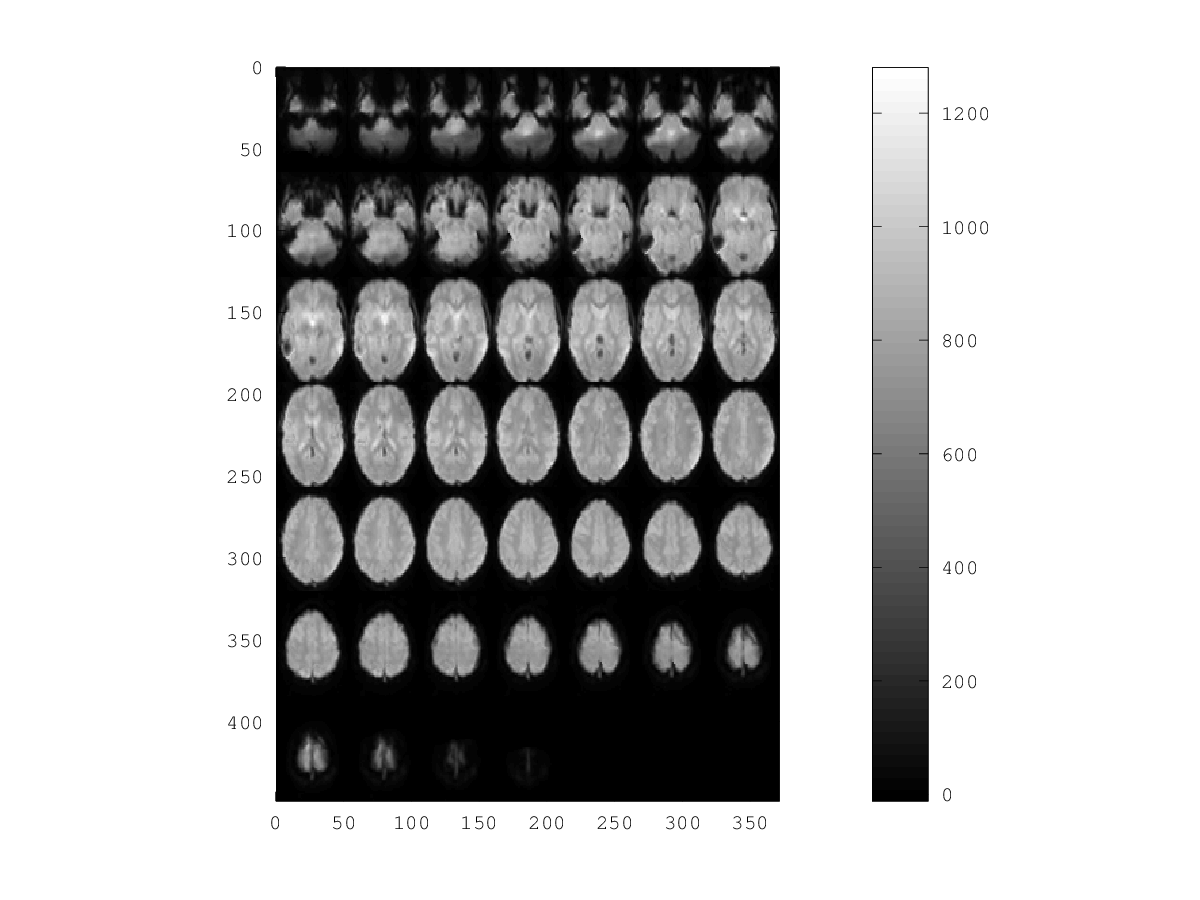

In [7]:
# Dispaly before correction image
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,vol_raw] = niak_read_vol(files_in.vol);
opt.type_color = 'gray';
niak_montage(vol_raw,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


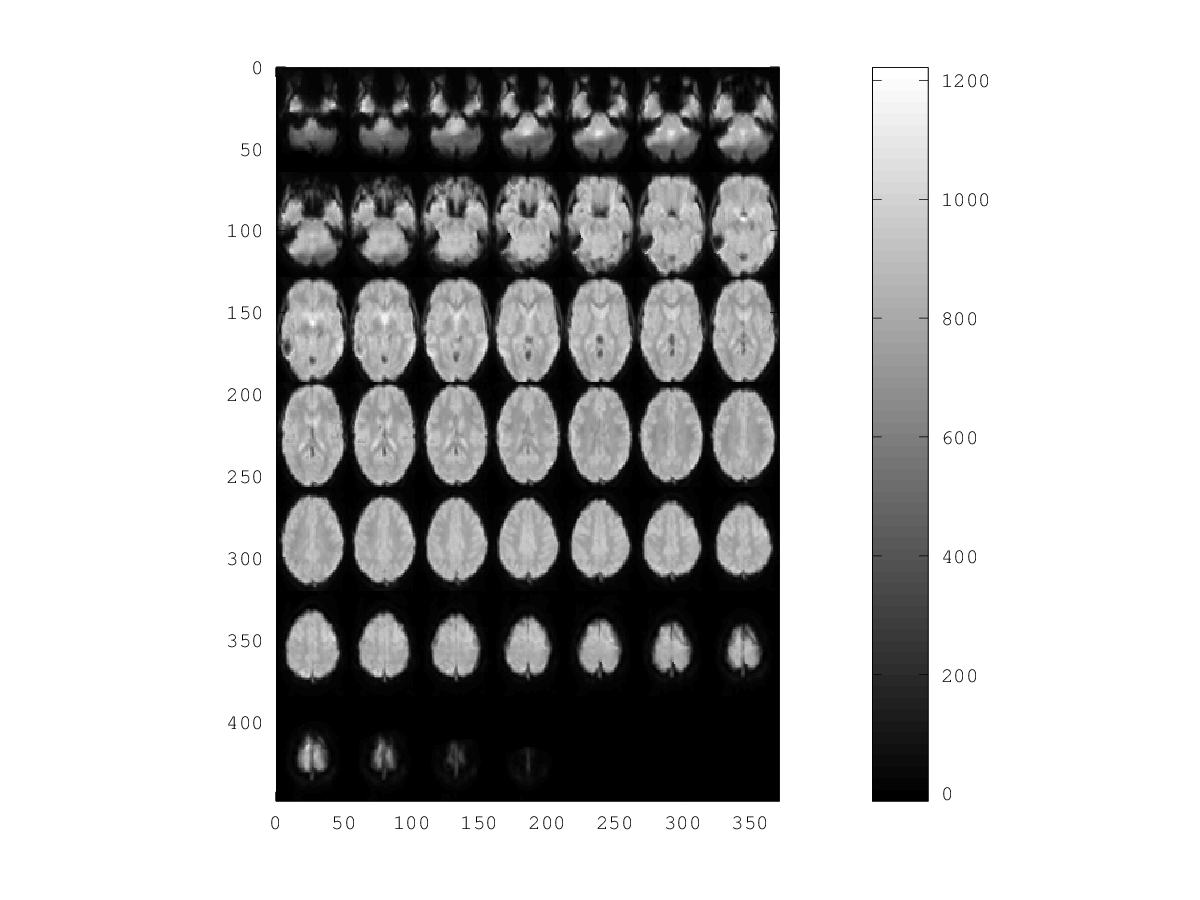

In [8]:
# After correction
niak_montage(vol,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


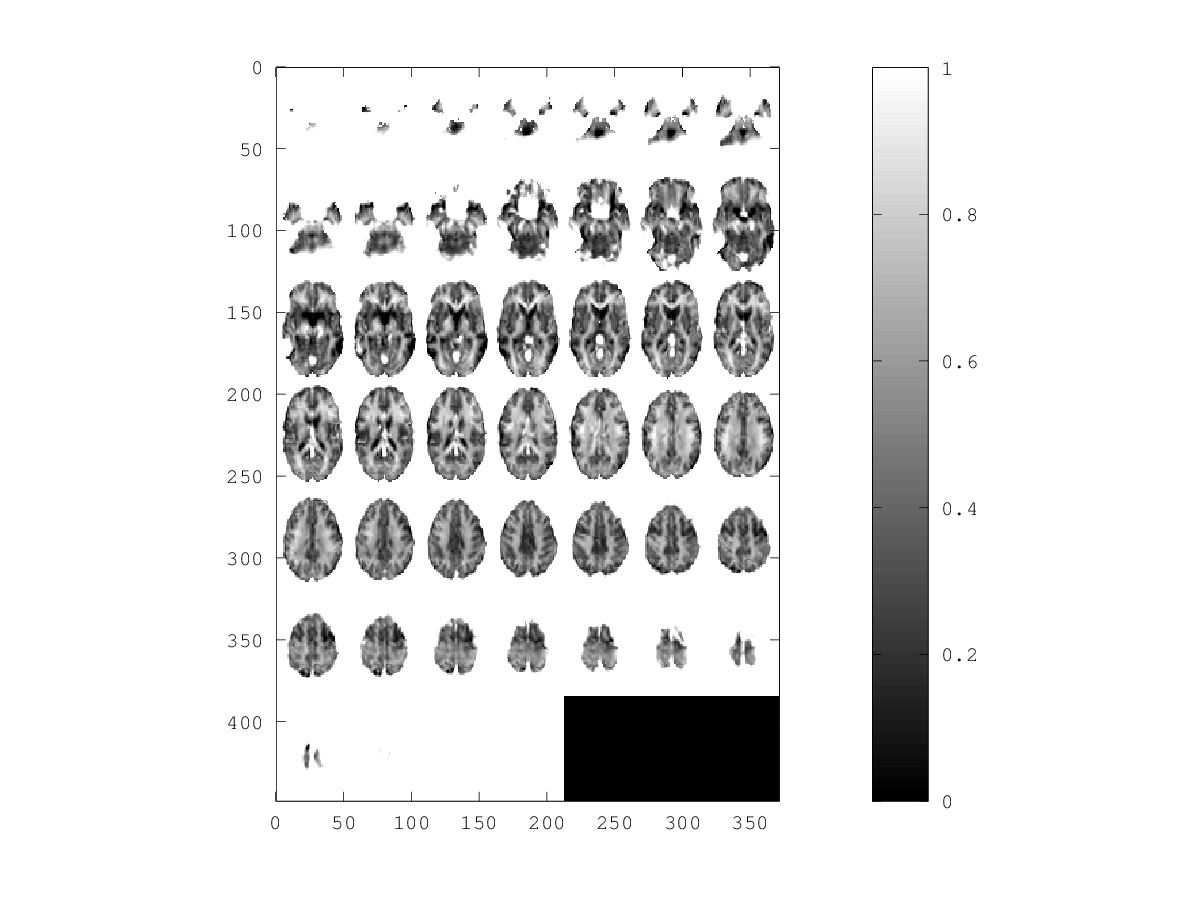

In [9]:
%% Invert contrast
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,mask] = niak_read_vol(files_in.mask);
param.perc_min = 0.15;
param.perc_max = 0.99;

mask = mask>0;
val = sort(vol(mask),'ascend');
vmin = val(round(param.perc_min*length(val)));
vmax = val(round(param.perc_max*length(val)));
vol(vol<vmin) = vmin;
vol(vol>vmax) = vmax;
vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = 0;
vol = 1 - vol;
vol = (abs(vol));
hdr.file_name =  [path_root 'template_layout/test_data/' subject '/func_' subject '_mean_stereonl_nu_inv.nii.gz'];
niak_write_vol(hdr,vol);

opt.type_color = 'gray';
niak_montage(vol,opt)

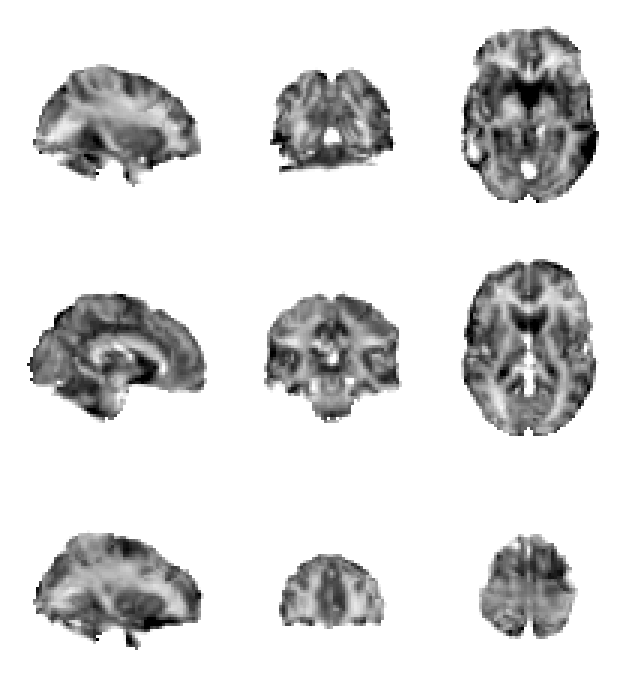

In [10]:
%% Create montage for the image
clear jin jout jopt
% Input
jin.source = [path_root 'template_layout/test_data/' subject '/func_' subject '_mean_stereonl_nu_inv.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/' subject '/func_' subject '_mean_stereonl_nu_inv.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = true;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

# Merge func and anat 

In [11]:
# read images
img1 = imread([path_root 'template_layout/test_data/' subject '/func_' subject '_mean_stereonl_nu_inv.png']);
img2 = imread([path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl.png']);

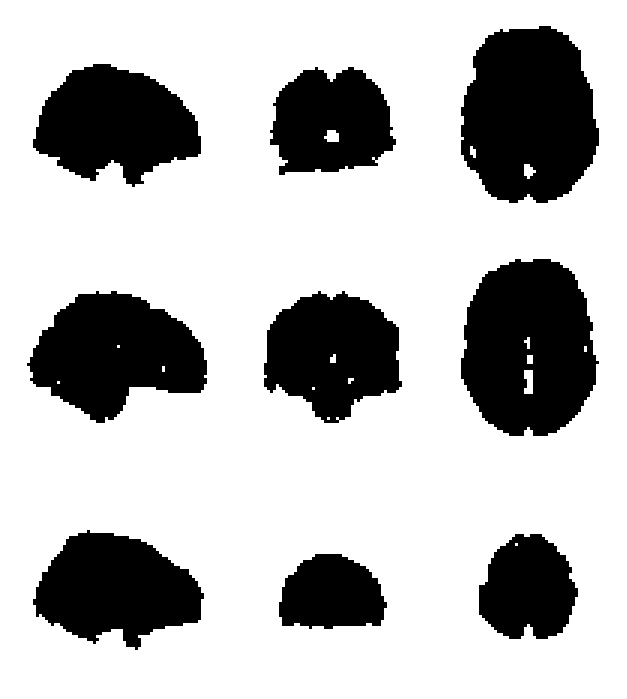

In [12]:
# buid a mask
img1_i = mean(img1,3); % Generate intensity
img1_i = img1_i / max(img1_i(:)); % Express intensity as a fraction of the max intensity
mask = img1_i >=1;
imshow(mask)

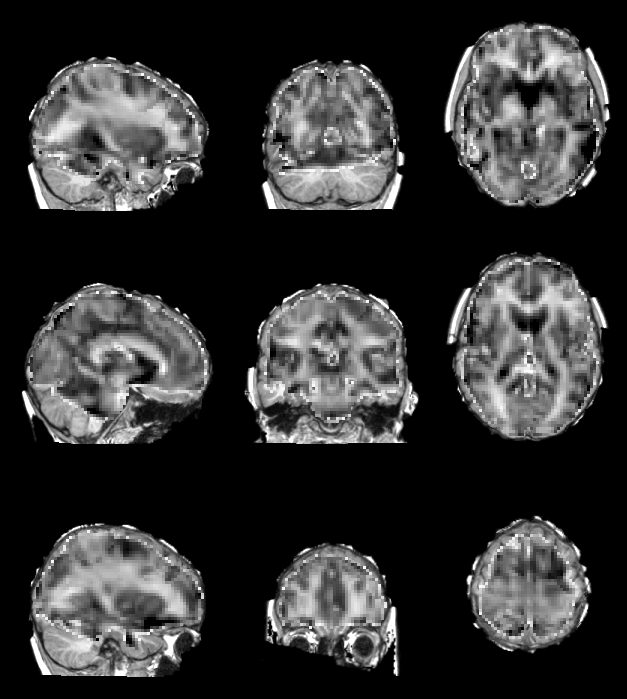

In [13]:
mask = repmat(mask,[1 1 3]);
img12 = img2;
img12(~mask) = img1(~mask);
imshow(img12)

In [14]:
# sebastian method
#x = size(img1,1);
#y = size(img1,2);
#mask = zeros(x,y);
#for xi=1:x
#    for yi=1:y
#        mask(xi,yi) = all(img1(xi, yi, :)==255);
#    end
#end

#mask_3d = repmat(logical(mask), 1, 1, 3);
#img_good = img2;
#img_good(~mask_3d) = img1(~mask_3d);

In [16]:
out=[path_root 'template_layout/test_data/' subject '/func_anat_' subject '_mean_stereonl_nu_inv.png'];
imwrite(img12,out,'quality',90);

## Add outlines

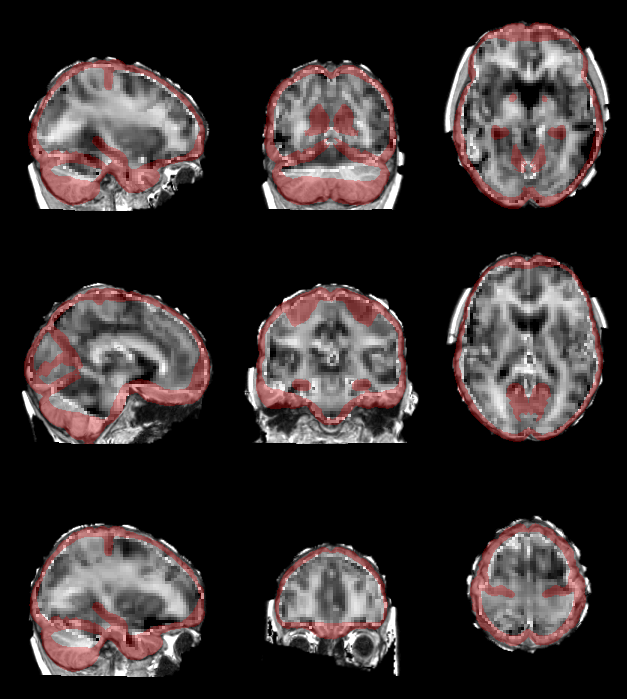

In [17]:
%% Add overlay 
clear jin jout jopt
jin.background =[path_root 'template_layout/test_data/' subject '/func_anat_' subject '_mean_stereonl_nu_inv.png'];
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/' subject '/func_anat_' subject '_mean_stereonl_nu_inv_outline.png'];
jopt.transparency = 0.7 ;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);
imshow(jout)

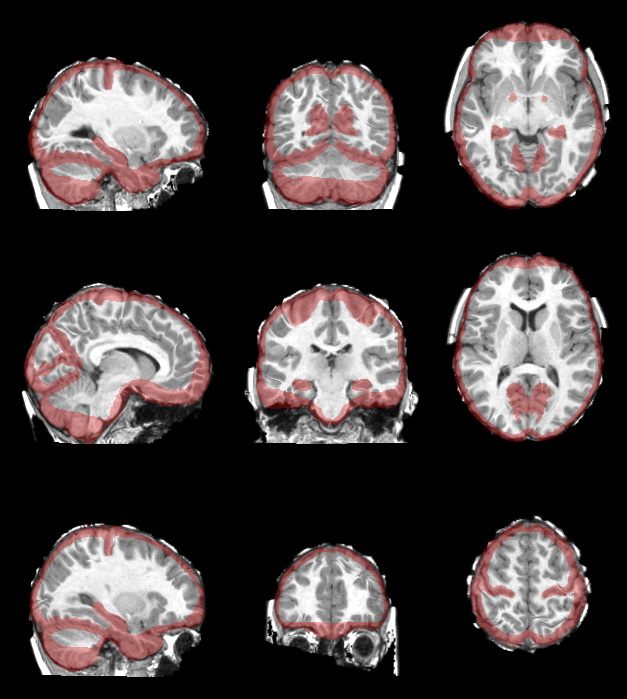

In [18]:
%% Add overlay functional-layout to anat subject 
clear jin jout jopt
param.transparency = 0.7;
jin.background =  [path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl.png'];
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl_func_outline.png'];
jopt.transparency = param.transparency;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);
imshow(jout)

## generate gif animation

In [21]:
# generate gif
PATH = ['/home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/' subject filesep];
command = ['convert '  PATH  'func_anat_' subject '_mean_stereonl_nu_inv_outline.png '  PATH ...
'anat_' subject '_nuc_stereonl_func_outline.png '   PATH  'func_anat_' subject '_mean_stereonl_nu_inv_outline.png  -delay 1 -morph 4 ' ...
PATH  'morph_' subject '_xp.gif']

command = convert /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/X_0015002/func_anat_X_0015002_mean_stereonl_nu_inv_outline.png /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/X_0015002/anat_X_0015002_nuc_stereonl_func_outline.png /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/X_0015002/func_anat_X_0015002_mean_stereonl_nu_inv_outline.png  -delay 1 -morph 4 /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/X_0015002/morph_X_0015002_xp.gif


In [22]:
system(command)

ans = 0


## XP result

The result is better that last XP, but still some improuvement

**Pierre's comment:**

- first contrast equalization needs to be consistent across subjects

- second we need to make sure that whatever is in the red outline does switch to the func image so we see if parts of the field of view are missing

-  ￼finally we need to make sure that whatever is in the func mask does switch to the func image so that if there is a leak outside of the brain mask, we see it

**conclusion**

Next xp build functional mask based that sum between an outline functional mask and the subject's bold mask.